In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [ ]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.3 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/new_test.csv', encoding= 'unicode_escape')

In [ ]:
pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 5.0 MB/s 


In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action
import os
!git clone https://github.com/makcedward/nlpaug.git
os.environ["MODEL_DIR"] = 'nlpaug/model/'

Cloning into 'nlpaug'...
remote: Enumerating objects: 5828, done.
remote: Counting objects: 100% (1355/1355), done.
remote: Compressing objects: 100% (444/444), done.
remote: Total 5828 (delta 954), reused 1243 (delta 901), pack-reused 4473
Receiving objects: 100% (5828/5828), 3.31 MiB | 23.37 MiB/s, done.
Resolving deltas: 100% (4116/4116), done.


In [ ]:
before_aug = data["review"]

In [ ]:
aug = nac.KeyboardAug()

In [ ]:
#augmented_data=  aug.augment(before_aug)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     300 non-null    int64 
 1   drugName     300 non-null    object
 2   condition    300 non-null    object
 3   review       300 non-null    object
 4   rating       300 non-null    int64 
 5   date         300 non-null    object
 6   usefulCount  300 non-null    int64 
 7   Sentiment    300 non-null    object
dtypes: int64(3), object(5)
memory usage: 18.9+ KB


In [ ]:
data["Sentiment"].value_counts()

Neutral     100
Positive    100
Negative    100
Name: Sentiment, dtype: int64

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     300 non-null    int64 
 1   drugName     300 non-null    object
 2   condition    300 non-null    object
 3   review       300 non-null    object
 4   rating       300 non-null    int64 
 5   date         300 non-null    object
 6   usefulCount  300 non-null    int64 
 7   Sentiment    300 non-null    object
dtypes: int64(3), object(5)
memory usage: 21.1+ KB


In [ ]:
data.shape

(300, 8)

In [ ]:
data.isnull().any().any()

False

In [ ]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     300 non-null    int64 
 1   drugName     300 non-null    object
 2   condition    300 non-null    object
 3   review       300 non-null    object
 4   rating       300 non-null    int64 
 5   date         300 non-null    object
 6   usefulCount  300 non-null    int64 
 7   Sentiment    300 non-null    object
dtypes: int64(3), object(5)
memory usage: 21.1+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data['vader_score'] = data['review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
data["vader_score"]

0      0.6160
1     -0.3292
2     -0.6409
3      0.9716
4     -0.6876
        ...  
295    0.0000
296   -0.9225
297    0.0889
298   -0.9791
299   -0.7717
Name: vader_score, Length: 300, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uniqueID     300 non-null    int64  
 1   drugName     300 non-null    object 
 2   condition    300 non-null    object 
 3   review       300 non-null    object 
 4   rating       300 non-null    int64  
 5   date         300 non-null    object 
 6   usefulCount  300 non-null    int64  
 7   Sentiment    300 non-null    object 
 8   vader_score  300 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 23.4+ KB


In [ ]:
positive_num = len(data[data['vader_score']>= 0.05])
neutral_num = len(data[data['vader_score']< 0.05]) and len(data[data['vader_score']>= 0.00])
negative_num = len(data[data['vader_score']< 0.00])

In [ ]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment,vader_score
0,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,Neutral,0.6160
1,221320,Dextromethorphan,Cough,"""Have a little bit of a lingering cough from a...",4,7-Sep-17,1,Neutral,-0.3292
2,51215,Azithromycin,Chlamydia Infection,"""Was prescribed one dose over the course of on...",7,14-Dec-15,7,Neutral,-0.6409
3,132258,Ativan,Panic Disorde,"""Honestly, I have been taking ativan for 2 yea...",6,1-Jun-15,47,Neutral,0.9716
4,204999,Toradol,Pain,"""I am 30 years old. I had a multiple composite...",10,11-Feb-13,16,Positive,-0.6876


In [ ]:
positive_num, negative_num, neutral_num

(123, 163, 137)

In [ ]:
data['vader_sentiment_label'] = data['vader_score'].map(lambda x : int(1) if x>= 0.05  else int (-1) if x<0.00 else int(0))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uniqueID               300 non-null    int64  
 1   drugName               300 non-null    object 
 2   condition              300 non-null    object 
 3   review                 300 non-null    object 
 4   rating                 300 non-null    int64  
 5   date                   300 non-null    object 
 6   usefulCount            300 non-null    int64  
 7   Sentiment              300 non-null    object 
 8   vader_score            300 non-null    float64
 9   vader_sentiment_label  300 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 25.8+ KB


In [ ]:
data.head(20)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment,vader_score,vader_sentiment_label
0,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,Neutral,0.6160,1
1,221320,Dextromethorphan,Cough,"""Have a little bit of a lingering cough from a...",4,7-Sep-17,1,Neutral,-0.3292,-1
2,51215,Azithromycin,Chlamydia Infection,"""Was prescribed one dose over the course of on...",7,14-Dec-15,7,Neutral,-0.6409,-1
3,132258,Ativan,Panic Disorde,"""Honestly, I have been taking ativan for 2 yea...",6,1-Jun-15,47,Neutral,0.9716,1
4,204999,Toradol,Pain,"""I am 30 years old. I had a multiple composite...",10,11-Feb-13,16,Positive,-0.6876,-1
5,71188,Viberzi,Irritable Bowel Syndrome,"""Have been taking Viberzi for a month now for ...",8,5-Jul-16,15,Positive,0.7946,1
6,80520,Mobic,Osteoarthritis,"""Reduced my pain by 80% and lets me live a nor...",10,13-May-15,82,Positive,-0.5562,-1
7,93678,Morphine,Pain,"""I have been on morphine for at least 7 years....",8,8-May-10,19,Positive,-0.5106,-1
8,206444,Trilafon,Psychosis,"""I had a similar experience. Tremors in hands...",9,23-May-11,45,Positive,0.8747,1
9,221934,Fluconazole,Vaginal Yeast Infection,"""I am very prone to yeast infections, I believ...",8,24-Apr-17,9,Positive,-0.2960,-1


In [ ]:
data["vader_sentiment_label"].value_counts()

-1    163
 1    123
 0     14
Name: vader_sentiment_label, dtype: int64

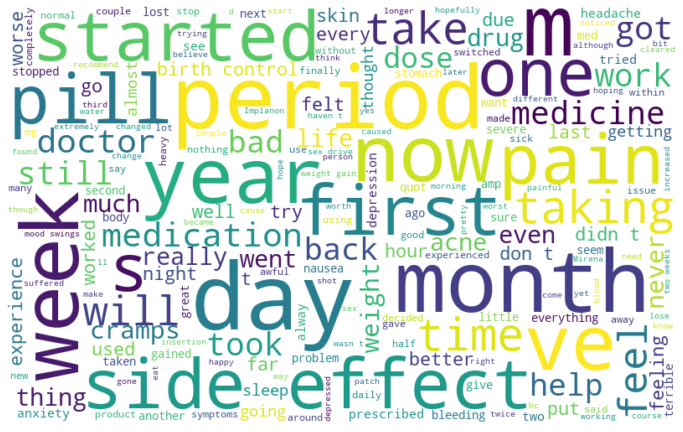

In [ ]:
all_words = ' '.join([text for text in data['review']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

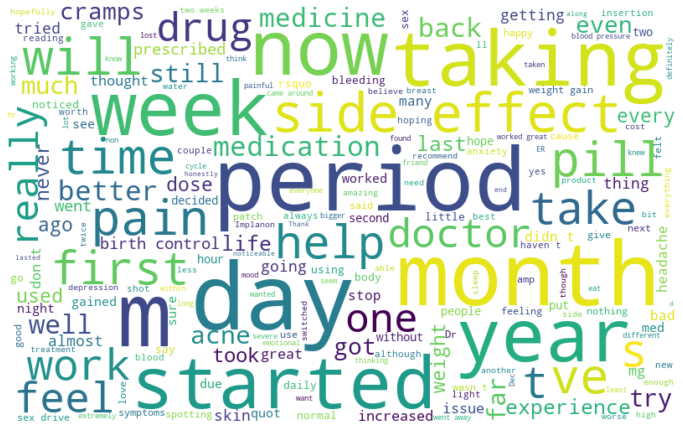

In [ ]:
positive_words = ' '.join([text for text in data['review'][data['vader_sentiment_label']== 1]])

wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

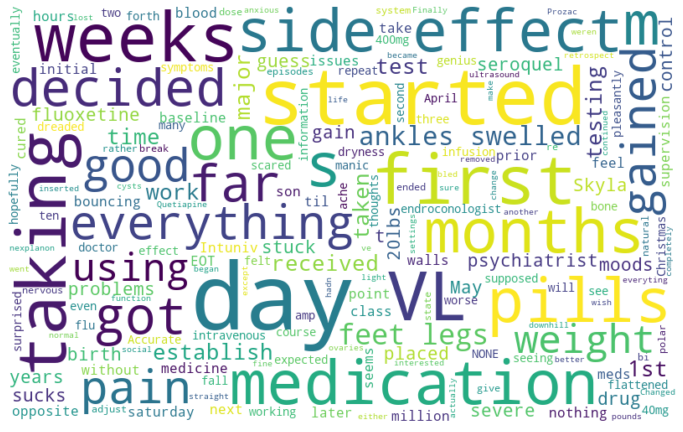

In [ ]:
neutral_words = ' '.join([text for text in data['review'][data['vader_sentiment_label']== 0]])

wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(neutral_words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

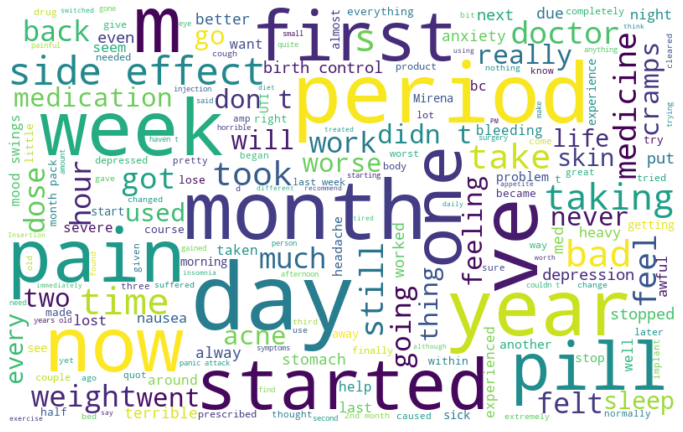

In [ ]:
negative_words = ' '.join([text for text in data['review'][data['vader_sentiment_label']== -1]])

wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
! pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-8imiucqg
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-8imiucqg
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=0f9818b90764c8724fbb6fdab2a435e87b124582cb6ca135e04f367df95ad02c
  Stored in directory: /tmp/pip-ephem-wheel-cache-pgp9qph0/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps
import re

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
data['review'] = data['review'].apply(lambda x: get_clean(x))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
tfidf = TfidfVectorizer(max_features=40000, ngram_range=(1,5),  stop_words='english' , analyzer='word')

In [ ]:
data['review']

0      i used to take another oral contraceptive whic...
1      have a little bit of a lingering cough from a ...
2      was prescribed one dose over the course of one...
3      honestly i have been taking ativan for 2 years...
4      i am 30 years old i had a multiple composite s...
                             ...                        
295    after using medication for 4 days my feet legs...
296    ive been taking arava for 12 months or so now ...
297    celexa worked really well for me in terms of s...
298    been experiencing very bad anxiety panic attac...
299    after having tried everything available natura...
Name: review, Length: 300, dtype: object

In [ ]:
X = tfidf.fit_transform(data['review'])
Y = data['vader_sentiment_label']

In [ ]:
X

<300x37827 sparse matrix of type '<class 'numpy.float64'>'
	with 52229 stored elements in Compressed Sparse Row format>

In [ ]:
Y

0      1
1     -1
2     -1
3      1
4     -1
      ..
295    0
296   -1
297    1
298   -1
299   -1
Name: vader_sentiment_label, Length: 300, dtype: int64

In [ ]:
X.shape, Y.shape

((300, 37827), (300,))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape

(240, 37827)

In [ ]:
Y_train.shape

(240,)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
randomf = RandomForestClassifier(n_estimators=100)
randomf.fit(X_train, Y_train)
rf_pred = randomf.predict(X_test)
rf_acc=accuracy_score(Y_test, rf_pred)
print(rf_acc)

0.7


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, rf_pred))

              precision    recall  f1-score   support

          -1       0.66      0.91      0.76        32
           0       1.00      0.67      0.80         3
           1       0.79      0.44      0.56        25

    accuracy                           0.70        60
   macro avg       0.81      0.67      0.71        60
weighted avg       0.73      0.70      0.68        60



Text(0.5, 145.31999999999996, 'Predicted')

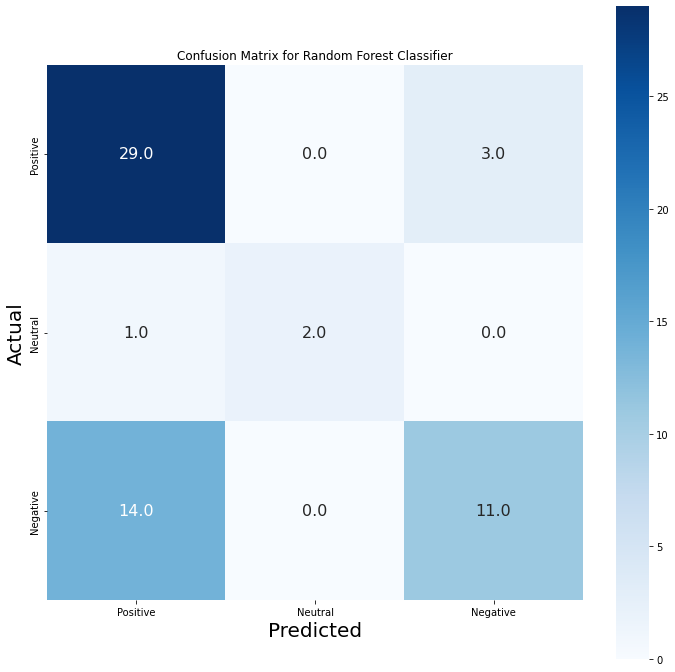

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = rf_pred
label=['Positive', 'Neutral','Negative']
Ytrue = Y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Random Forest Classifier")
ax = sns.heatmap(cm, cmap="Blues", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_RF = confusion_matrix(Y_test, rf_pred, labels=[1,0,-1])
cmt_RF = confusion_matrix(Y_test, rf_pred)

In [ ]:
print(cmt_RF)

[[29  0  3]
 [ 1  2  0]
 [14  0 11]]


In [ ]:
fp = cmt_RF.sum(axis=0) - np.diag(cm)  
fn = cmt_RF.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_RF)
tn = cmt_RF.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[15  0  3] [ 3  1 14] [29  2 11] [13 57 32]


In [ ]:
idx = 0
print( "TP rate for Class Positive:",tp[idx])
print( "TN rate for Class Positive:",tn[idx])
print( "FP rate for Class Positive:",fp[idx])
print( "FN rate for Class Positive:",fn[idx])

TP rate for Class Positive: 29
TN rate for Class Positive: 13
FP rate for Class Positive: 15
FN rate for Class Positive: 3


In [ ]:
idx = 1
print( "TP rate for Class Neutral:",tp[idx])
print( "TN rate for Class Neutral:",tn[idx])
print( "FP rate for Class Neutral:",fp[idx])
print( "FN rate for Class Neutral:",fn[idx])

TP rate for Class Neutral: 2
TN rate for Class Neutral: 57
FP rate for Class Neutral: 0
FN rate for Class Neutral: 1


In [ ]:
idx = 2
print( "TP rate for Class Negative:",tp[idx])
print( "TN rate for Class Negative:",tn[idx])
print( "FP rate for Class Negative:",fp[idx])
print( "FN rate for Class Negative:",fn[idx])

TP rate for Class Negative: 11
TN rate for Class Negative: 32
FP rate for Class Negative: 3
FN rate for Class Negative: 14


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.7


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [ ]:
RF = OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train, Y_train)
Y_pred = RF.predict(X_test)
pred_prob = RF.predict_proba(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(Y)
Y= label_encoder.transform(Y)
classes = label_encoder.classes_

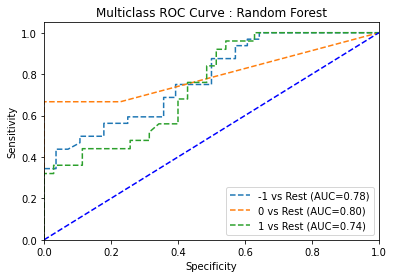

In [ ]:
from sklearn.preprocessing import label_binarize

Y_test_binarized = label_binarize(Y_test, classes = np.unique(Y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : Random Forest')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc= 'lower right')
plt.show()

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
KNN_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, KNN_pred))
print(classification_report(Y_test, KNN_pred))

[[23  0  9]
 [ 0  1  2]
 [15  0 10]]
              precision    recall  f1-score   support

          -1       0.61      0.72      0.66        32
           0       1.00      0.33      0.50         3
           1       0.48      0.40      0.43        25

    accuracy                           0.57        60
   macro avg       0.69      0.48      0.53        60
weighted avg       0.57      0.57      0.56        60



Text(0.5, 145.31999999999996, 'Predicted')

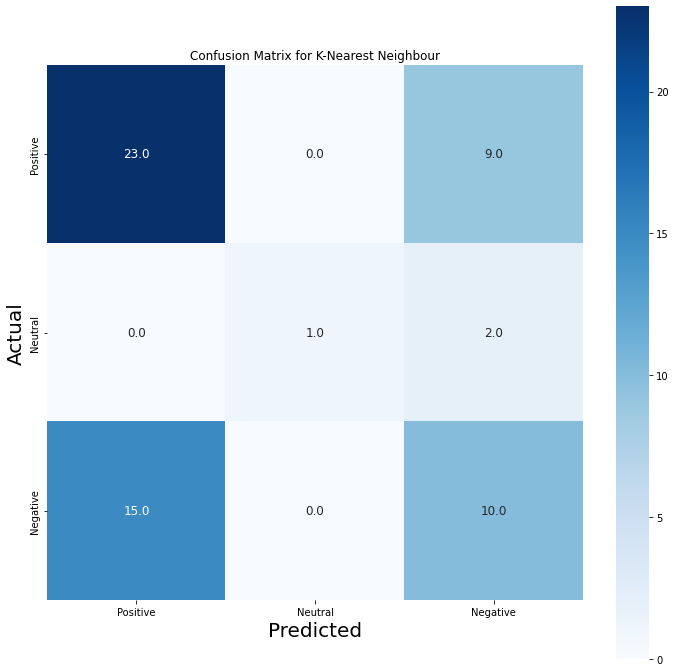

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = KNN_pred
label=['Positive', 'Neutral','Negative']
Ytrue = Y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for K-Nearest Neighbour")
ax = sns.heatmap(cm, cmap="Blues", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_KNN = confusion_matrix(Y_test, KNN_pred, labels=[1,0,-1])
cmt_KNN = confusion_matrix(Y_test, KNN_pred)

In [ ]:
print(cmt_KNN)

[[23  0  9]
 [ 0  1  2]
 [15  0 10]]


In [ ]:
fp = cmt_KNN.sum(axis=0) - np.diag(cm)  
fn = cmt_KNN.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_KNN)
tn = cmt_KNN.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[15  0 11] [ 9  2 15] [23  1 10] [13 57 24]


In [ ]:
idx = 0
print( "TP rate for Class Positive:",tp[idx])
print( "TN rate for Class Positive:",tn[idx])
print( "FP rate for Class Positive:",fp[idx])
print( "FN rate for Class Positive:",fn[idx])

TP rate for Class Positive: 23
TN rate for Class Positive: 13
FP rate for Class Positive: 15
FN rate for Class Positive: 9


In [ ]:
idx = 1
print( "TP rate for Class Neutral:",tp[idx])
print( "TN rate for Class Neutral:",tn[idx])
print( "FP rate for Class Neutral:",fp[idx])
print( "FN rate for Class Neutral:",fn[idx])

TP rate for Class Neutral: 1
TN rate for Class Neutral: 57
FP rate for Class Neutral: 0
FN rate for Class Neutral: 2


In [ ]:
idx = 2
print( "TP rate for Class Negative:",tp[idx])
print( "TN rate for Class Negative:",tn[idx])
print( "FP rate for Class Negative:",fp[idx])
print( "FN rate for Class Negative:",fn[idx])

TP rate for Class Negative: 10
TN rate for Class Negative: 24
FP rate for Class Negative: 11
FN rate for Class Negative: 15


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.5666666666666667


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
KNN.fit(X_train, Y_train)
Y_pred = KNN.predict(X_test)
pred_prob = KNN.predict_proba(X_test)

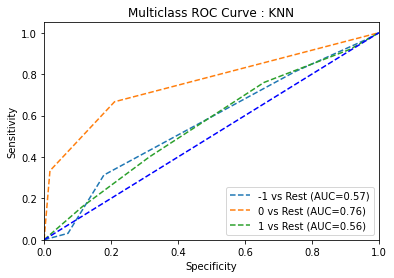

In [ ]:
from sklearn.preprocessing import label_binarize

Y_test_binarized = label_binarize(Y_test, classes = np.unique(Y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : KNN')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc= 'lower right')
plt.show()

**ANN**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
nnc = MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000)
nnc.fit(X_train, Y_train)
nnc_pred =nnc.predict(X_test)
nnc_acc=accuracy_score(Y_test, nnc_pred)
print(nnc_acc)

0.7333333333333333


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, nnc_pred))

              precision    recall  f1-score   support

          -1       0.74      0.81      0.78        32
           0       1.00      0.67      0.80         3
           1       0.70      0.64      0.67        25

    accuracy                           0.73        60
   macro avg       0.81      0.71      0.75        60
weighted avg       0.74      0.73      0.73        60



Text(0.5, 145.31999999999996, 'Predicted')

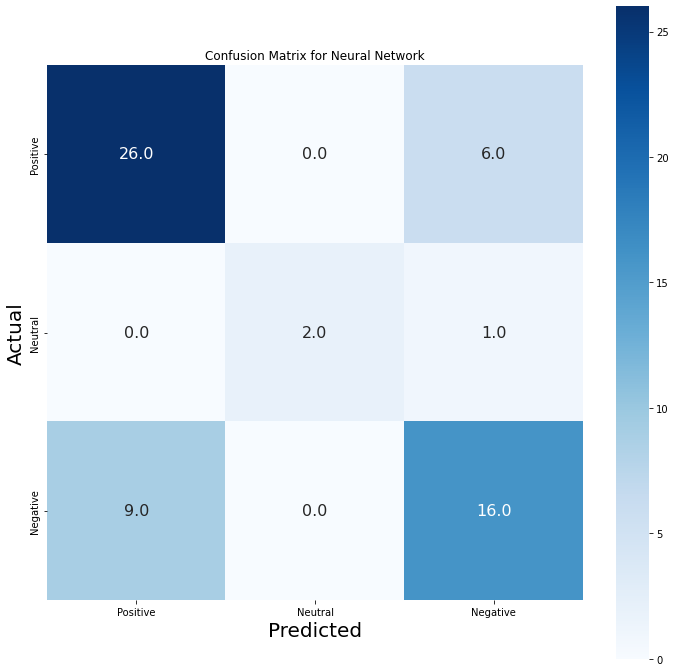

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = nnc_pred
label=['Positive', 'Neutral','Negative']
Ytrue = Y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Neural Network")
ax = sns.heatmap(cm, cmap="Blues", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_ANN = confusion_matrix(Y_test, nnc_pred, labels=[1,0,-1])
cmt_ANN = confusion_matrix(Y_test, nnc_pred)

In [ ]:
print(cmt_ANN)

[[26  0  6]
 [ 0  2  1]
 [ 9  0 16]]


In [ ]:
fp = cmt_ANN.sum(axis=0) - np.diag(cm)  
fn = cmt_ANN.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_ANN)
tn = cmt_ANN.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[9 0 7] [6 1 9] [26  2 16] [19 57 28]


In [ ]:
idx = 0
print( "TP rate for Class Positive:",tp[idx])
print( "TN rate for Class Positive:",tn[idx])
print( "FP rate for Class Positive:",fp[idx])
print( "FN rate for Class Positive:",fn[idx])

TP rate for Class Positive: 26
TN rate for Class Positive: 19
FP rate for Class Positive: 9
FN rate for Class Positive: 6


In [ ]:
idx = 1
print( "TP rate for Class Neutral:",tp[idx])
print( "TN rate for Class Neutral:",tn[idx])
print( "FP rate for Class Neutral:",fp[idx])
print( "FN rate for Class Neutral:",fn[idx])

TP rate for Class Neutral: 2
TN rate for Class Neutral: 57
FP rate for Class Neutral: 0
FN rate for Class Neutral: 1


In [ ]:
idx = 2
print( "TP rate for Class Negative:",tp[idx])
print( "TN rate for Class Negative:",tn[idx])
print( "FP rate for Class Negative:",fp[idx])
print( "FN rate for Class Negative:",fn[idx])

TP rate for Class Negative: 16
TN rate for Class Negative: 28
FP rate for Class Negative: 7
FN rate for Class Negative: 9


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.7333333333333333


In [ ]:
from sklearn.neural_network import MLPClassifier
ANN = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000))
ANN.fit(X_train, Y_train)
Y_pred = ANN.predict(X_test)
pred_prob = ANN.predict_proba(X_test)

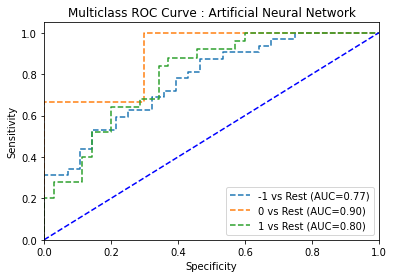

In [ ]:
from sklearn.preprocessing import label_binarize

Y_test_binarized = label_binarize(Y_test, classes = np.unique(Y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : Artificial Neural Network')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc= 'lower right')
plt.show()

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf_NB = MultinomialNB()
clf_NB.fit(X_train, Y_train)
NB_pred = clf_NB.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, NB_pred))

              precision    recall  f1-score   support

          -1       0.58      1.00      0.74        32
           0       0.00      0.00      0.00         3
           1       1.00      0.20      0.33        25

    accuracy                           0.62        60
   macro avg       0.53      0.40      0.36        60
weighted avg       0.73      0.62      0.53        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, NB_pred))
print(classification_report(Y_test, NB_pred))

[[32  0  0]
 [ 3  0  0]
 [20  0  5]]
              precision    recall  f1-score   support

          -1       0.58      1.00      0.74        32
           0       0.00      0.00      0.00         3
           1       1.00      0.20      0.33        25

    accuracy                           0.62        60
   macro avg       0.53      0.40      0.36        60
weighted avg       0.73      0.62      0.53        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 145.31999999999996, 'Predicted')

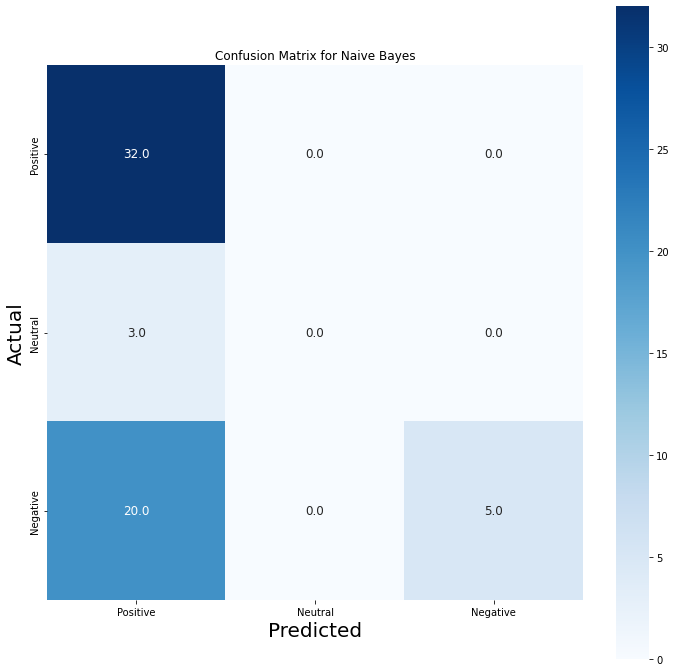

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = NB_pred
label=['Positive', 'Neutral','Negative']
Ytrue = Y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Naive Bayes")
ax = sns.heatmap(cm, cmap="Blues", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_NB = confusion_matrix(Y_test, NB_pred, labels=[1,0,-1])
cmt_NB = confusion_matrix(Y_test, NB_pred)

In [ ]:
print(cmt_NB)

[[32  0  0]
 [ 3  0  0]
 [20  0  5]]


In [ ]:
fp = cmt_NB.sum(axis=0) - np.diag(cm)  
fn = cmt_NB.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_NB)
tn = cmt_NB.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[23  0  0] [ 0  3 20] [32  0  5] [ 5 57 35]


In [ ]:
idx = 0
print( "TP rate for Class Positive:",tp[idx])
print( "TN rate for Class Positive:",tn[idx])
print( "FP rate for Class Positive:",fp[idx])
print( "FN rate for Class Positive:",fn[idx])

TP rate for Class Positive: 32
TN rate for Class Positive: 5
FP rate for Class Positive: 23
FN rate for Class Positive: 0


In [ ]:
idx = 1
print( "TP rate for Class Neutral:",tp[idx])
print( "TN rate for Class Neutral:",tn[idx])
print( "FP rate for Class Neutral:",fp[idx])
print( "FN rate for Class Neutral:",fn[idx])

TP rate for Class Neutral: 0
TN rate for Class Neutral: 57
FP rate for Class Neutral: 0
FN rate for Class Neutral: 3


In [ ]:
idx = 2
print( "TP rate for Class Negative:",tp[idx])
print( "TN rate for Class Negative:",tn[idx])
print( "FP rate for Class Negative:",fp[idx])
print( "FN rate for Class Negative:",fn[idx])

TP rate for Class Negative: 5
TN rate for Class Negative: 35
FP rate for Class Negative: 0
FN rate for Class Negative: 20


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.6166666666666667


In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB = OneVsRestClassifier(MultinomialNB())
NB.fit(X_train, Y_train)
Y_pred = NB.predict(X_test)
pred_prob = NB.predict_proba(X_test)

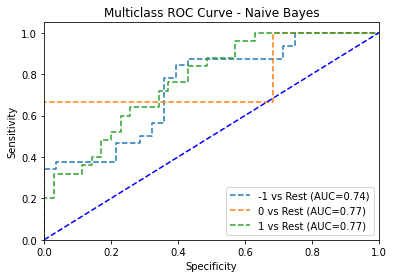

In [ ]:
from sklearn.preprocessing import label_binarize

Y_test_binarized = label_binarize(Y_test, classes = np.unique(Y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve - Naive Bayes')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc= 'lower right')
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(max_depth=6, random_state=1)
# Predict test set labels
dt.fit(X_train, Y_train)
DT_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(Y_test, DT_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.60


In [ ]:
print(classification_report(Y_test, DT_pred))

              precision    recall  f1-score   support

          -1       0.60      0.75      0.67        32
           0       1.00      0.33      0.50         3
           1       0.58      0.44      0.50        25

    accuracy                           0.60        60
   macro avg       0.73      0.51      0.56        60
weighted avg       0.61      0.60      0.59        60



Text(0.5, 145.31999999999996, 'Predicted')

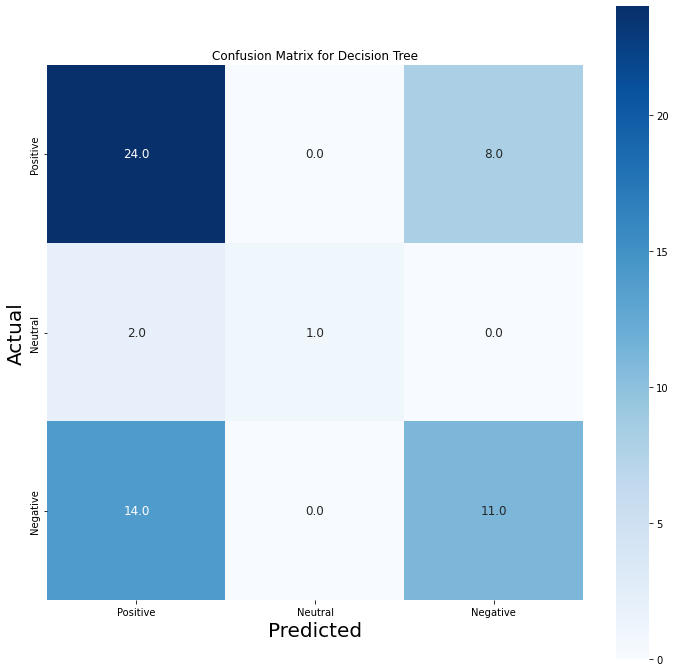

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = DT_pred
label=['Positive', 'Neutral','Negative']
Ytrue = Y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Decision Tree")
ax = sns.heatmap(cm, cmap="Blues", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_DT = confusion_matrix(Y_test, DT_pred, labels=[1,0,-1])
cmt_DT = confusion_matrix(Y_test, DT_pred)

In [ ]:
print(cmt_DT)

[[24  0  8]
 [ 2  1  0]
 [14  0 11]]


In [ ]:
fp = cmt_DT.sum(axis=0) - np.diag(cm)  
fn = cmt_DT.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_DT)
tn = cmt_DT.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[16  0  8] [ 8  2 14] [24  1 11] [12 57 27]


In [ ]:
idx = 0
print( "TP rate for Class Positive:",tp[idx])
print( "TN rate for Class Positive:",tn[idx])
print( "FP rate for Class Positive:",fp[idx])
print( "FN rate for Class Positive:",fn[idx])

TP rate for Class Positive: 24
TN rate for Class Positive: 12
FP rate for Class Positive: 16
FN rate for Class Positive: 8


In [ ]:
idx = 1
print( "TP rate for Class Neutral:",tp[idx])
print( "TN rate for Class Neutral:",tn[idx])
print( "FP rate for Class Neutral:",fp[idx])
print( "FN rate for Class Neutral:",fn[idx])

TP rate for Class Neutral: 1
TN rate for Class Neutral: 57
FP rate for Class Neutral: 0
FN rate for Class Neutral: 2


In [ ]:
idx = 2
print( "TP rate for Class Negative:",tp[idx])
print( "TN rate for Class Negative:",tn[idx])
print( "FP rate for Class Negative:",fp[idx])
print( "FN rate for Class Negative:",fn[idx])

TP rate for Class Negative: 11
TN rate for Class Negative: 27
FP rate for Class Negative: 8
FN rate for Class Negative: 14


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.6


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = OneVsRestClassifier(DecisionTreeClassifier(max_depth=6, random_state=1))
DT.fit(X_train, Y_train)
y_pred = DT.predict(X_test)
pred_prob = DT.predict_proba(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = OneVsRestClassifier(DecisionTreeClassifier(max_depth=6, random_state=1))
DT.fit(X_train, Y_train)
Y_pred = DT.predict(X_test)
pred_prob = DT.predict_proba(X_test)

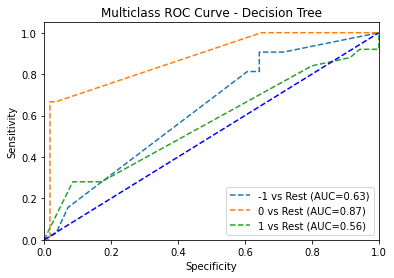

In [ ]:
from sklearn.preprocessing import label_binarize

Y_test_binarized = label_binarize(Y_test, classes = np.unique(Y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve - Decision Tree')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc= 'lower right')
plt.show()

**Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
from  sklearn.utils import parallel_backend 
gboost = GradientBoostingClassifier(learning_rate=.1, n_estimators=500,max_depth=5 )
gboost.fit(X_train, Y_train)
gboost_pred = gboost.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
gboost_acc=accuracy_score(Y_test, gboost_pred)
print(gboost_acc)

0.5833333333333334


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, gboost_pred))

              precision    recall  f1-score   support

          -1       0.61      0.72      0.66        32
           0       0.67      0.67      0.67         3
           1       0.53      0.40      0.45        25

    accuracy                           0.58        60
   macro avg       0.60      0.60      0.59        60
weighted avg       0.58      0.58      0.57        60



Text(0.5, 145.31999999999996, 'Predicted')

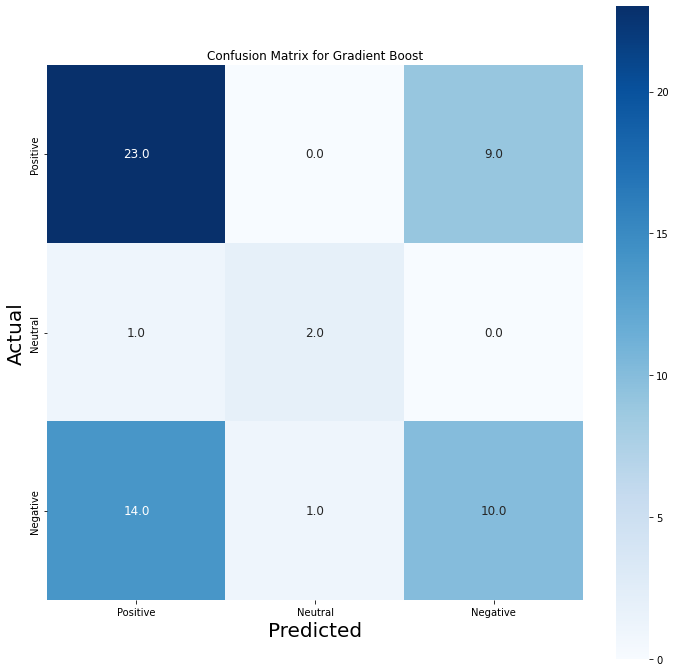

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = gboost_pred
label=['Positive', 'Neutral','Negative']
Ytrue = Y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Gradient Boost")
ax = sns.heatmap(cm, cmap="Blues", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_gboost = confusion_matrix(Y_test, gboost_pred, labels=[1,0,-1])
cmt_gboost = confusion_matrix(Y_test, gboost_pred)

In [ ]:
print(cmt_gboost)

[[23  0  9]
 [ 1  2  0]
 [14  1 10]]


In [ ]:
fp = cmt_gboost.sum(axis=0) - np.diag(cm)  
fn = cmt_gboost.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_gboost)
tn = cmt_gboost.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[15  1  9] [ 9  1 15] [23  2 10] [13 56 26]


In [ ]:
idx = 0
print( "TP rate for Class Positive:",tp[idx])
print( "TN rate for Class Positive:",tn[idx])
print( "FP rate for Class Positive:",fp[idx])
print( "FN rate for Class Positive:",fn[idx])

TP rate for Class Positive: 23
TN rate for Class Positive: 13
FP rate for Class Positive: 15
FN rate for Class Positive: 9


In [ ]:
idx = 1
print( "TP rate for Class Neutral:",tp[idx])
print( "TN rate for Class Neutral:",tn[idx])
print( "FP rate for Class Neutral:",fp[idx])
print( "FN rate for Class Neutral:",fn[idx])

TP rate for Class Neutral: 2
TN rate for Class Neutral: 56
FP rate for Class Neutral: 1
FN rate for Class Neutral: 1


In [ ]:
idx = 2
print( "TP rate for Class Negative:",tp[idx])
print( "TN rate for Class Negative:",tn[idx])
print( "FP rate for Class Negative:",fp[idx])
print( "FN rate for Class Negative:",fn[idx])

TP rate for Class Negative: 10
TN rate for Class Negative: 26
FP rate for Class Negative: 9
FN rate for Class Negative: 15


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.5833333333333334


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
gboost = OneVsRestClassifier(GradientBoostingClassifier(learning_rate=.1, n_estimators=500,max_depth=5 ))
gboost.fit(X_train, Y_train)
y_pred = gboost.predict(X_test)
pred_prob = gboost.predict_proba(X_test)

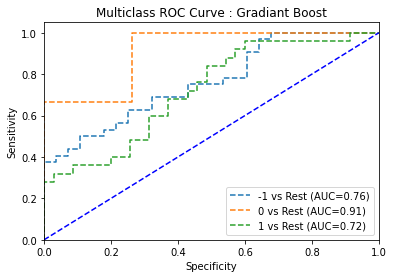

In [ ]:
from sklearn.preprocessing import label_binarize

Y_test_binarized = label_binarize(Y_test, classes = np.unique(Y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : Gradiant Boost')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc= 'lower right')
plt.show()

**AdaBoost**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
randomf = RandomForestClassifier(n_jobs=-1)
dtree = DecisionTreeClassifier( criterion='entropy')
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(randomf, n_estimators=500000, learning_rate=.5)
ab.fit(X_train, Y_train)
ab_pred = ab.predict(X_test)
ab_acc=accuracy_score(Y_test, ab_pred)
print(ab_acc)

0.65


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, ab_pred))

              precision    recall  f1-score   support

          -1       0.65      0.75      0.70        32
           0       1.00      0.67      0.80         3
           1       0.62      0.52      0.57        25

    accuracy                           0.65        60
   macro avg       0.76      0.65      0.69        60
weighted avg       0.65      0.65      0.65        60



Text(0.5, 145.31999999999996, 'Predicted')

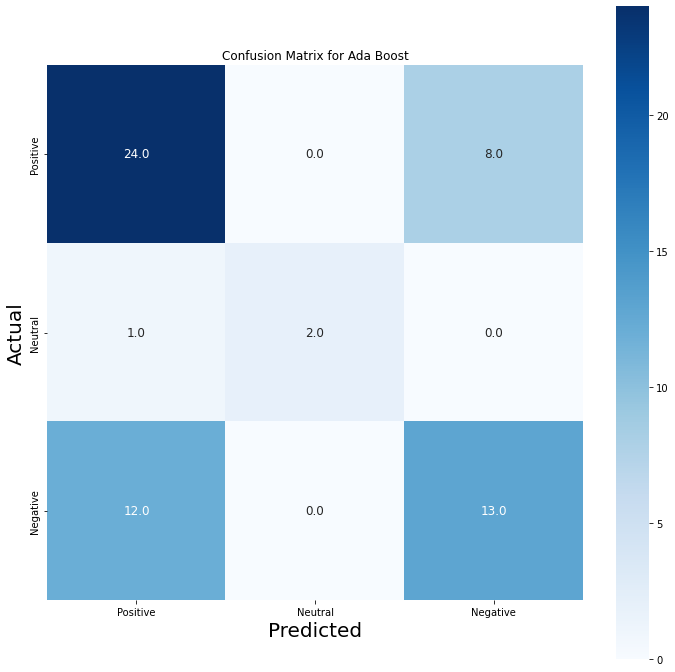

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = ab_pred
label=['Positive', 'Neutral','Negative']
Ytrue = Y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Ada Boost")
ax = sns.heatmap(cm, cmap="Blues", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_adaoost = confusion_matrix(Y_test, ab_pred, labels=[1,0,-1])
cmt_adaboost = confusion_matrix(Y_test, ab_pred)

In [ ]:
print(cmt_adaboost)

[[24  0  8]
 [ 1  2  0]
 [12  0 13]]


In [ ]:
fp = cmt_adaoost.sum(axis=0) - np.diag(cm)  
fn = cmt_adaoost.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_adaoost)
tn = cmt_adaoost.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[-3  0 24] [ 1  1 19] [13  2 24] [49 57 -7]


In [ ]:
idx = 0
print( "TP rate for Class Positive:",tp[idx])
print( "TN rate for Class Positive:",tn[idx])
print( "FP rate for Class Positive:",fp[idx])
print( "FN rate for Class Positive:",fn[idx])

TP rate for Class Positive: 13
TN rate for Class Positive: 49
FP rate for Class Positive: -3
FN rate for Class Positive: 1


In [ ]:
idx = 1
print( "TP rate for Class Neutral:",tp[idx])
print( "TN rate for Class Neutral:",tn[idx])
print( "FP rate for Class Neutral:",fp[idx])
print( "FN rate for Class Neutral:",fn[idx])

TP rate for Class Neutral: 2
TN rate for Class Neutral: 57
FP rate for Class Neutral: 0
FN rate for Class Neutral: 1


In [ ]:
idx = 2
print( "TP rate for Class Negative:",tp[idx])
print( "TN rate for Class Negative:",tn[idx])
print( "FP rate for Class Negative:",fp[idx])
print( "FN rate for Class Negative:",fn[idx])

TP rate for Class Negative: 24
TN rate for Class Negative: -7
FP rate for Class Negative: 24
FN rate for Class Negative: 19


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.65


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
adaboost = OneVsRestClassifier(AdaBoostClassifier(randomf, n_estimators=500000, learning_rate=.5))
adaboost.fit(X_train, Y_train)
y_pred = adaboost.predict(X_test)
pred_prob = adaboost.predict_proba(X_test)

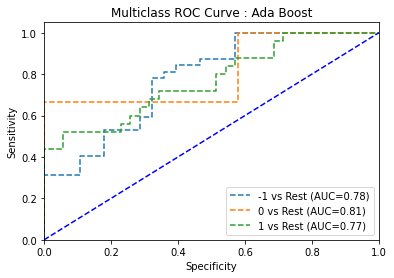

In [ ]:
from sklearn.preprocessing import label_binarize

Y_test_binarized = label_binarize(Y_test, classes = np.unique(Y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : Ada Boost')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc= 'lower right')
plt.show()

**Xtreme Gradient Boost**

In [ ]:
import xgboost as xgb
xgbd = xgb.XGBClassifier(max_depth=10, n_estimators=5000 , learning_rate=.5, n_jobs=-1)
xgbd.fit(X_train, Y_train)
xgb_pred = xgbd.predict(X_test)
xgb_acc=accuracy_score(Y_test, xgb_pred)
print(xgb_acc)

0.6


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, xgb_pred))

              precision    recall  f1-score   support

          -1       0.64      0.66      0.65        32
           0       0.67      0.67      0.67         3
           1       0.54      0.52      0.53        25

    accuracy                           0.60        60
   macro avg       0.61      0.61      0.61        60
weighted avg       0.60      0.60      0.60        60



Text(0.5, 145.31999999999996, 'Predicted')

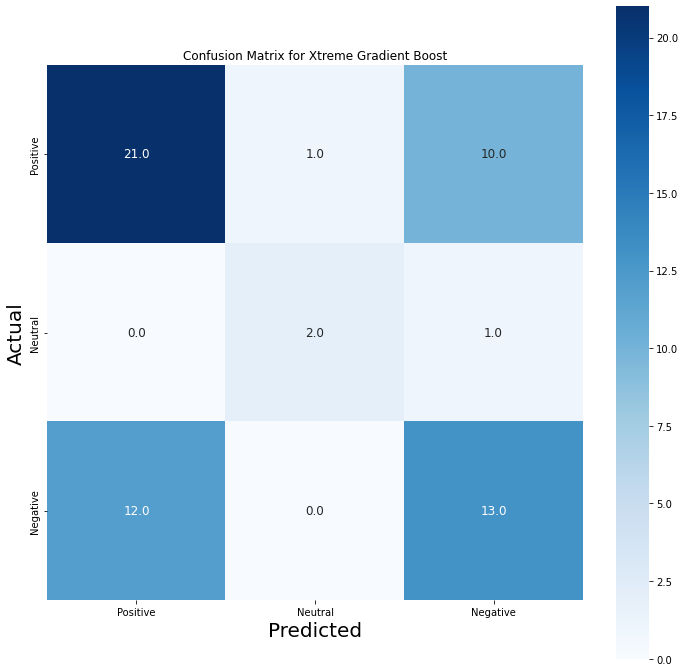

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = xgb_pred
label=['Positive', 'Neutral','Negative']
Ytrue = Y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Xtreme Gradient Boost")
ax = sns.heatmap(cm, cmap="Blues", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_xgb = confusion_matrix(Y_test, xgb_pred, labels=[1,0,-1])
cmt_xgb = confusion_matrix(Y_test, xgb_pred)

In [ ]:
print(cmt_xgb)

[[21  1 10]
 [ 0  2  1]
 [12  0 13]]


In [ ]:
fp = cmt_xgb.sum(axis=0) - np.diag(cm)  
fn = cmt_xgb.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_xgb)
tn = cmt_xgb.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[12  1 11] [11  1 12] [21  2 13] [16 56 24]


In [ ]:
idx = 0
print( "TP rate for Class Positive:",tp[idx])
print( "TN rate for Class Positive:",tn[idx])
print( "FP rate for Class Positive:",fp[idx])
print( "FN rate for Class Positive:",fn[idx])

TP rate for Class Positive: 21
TN rate for Class Positive: 16
FP rate for Class Positive: 12
FN rate for Class Positive: 11


In [ ]:
idx = 1
print( "TP rate for Class Neutral:",tp[idx])
print( "TN rate for Class Neutral:",tn[idx])
print( "FP rate for Class Neutral:",fp[idx])
print( "FN rate for Class Neutral:",fn[idx])

TP rate for Class Neutral: 2
TN rate for Class Neutral: 56
FP rate for Class Neutral: 1
FN rate for Class Neutral: 1


In [ ]:
idx = 2
print( "TP rate for Class Negative:",tp[idx])
print( "TN rate for Class Negative:",tn[idx])
print( "FP rate for Class Negative:",fp[idx])
print( "FN rate for Class Negative:",fn[idx])

TP rate for Class Negative: 13
TN rate for Class Negative: 24
FP rate for Class Negative: 11
FN rate for Class Negative: 12


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.6


In [ ]:
import xgboost as xgb
xgboost = OneVsRestClassifier(xgb.XGBClassifier(max_depth=10, n_estimators=5000 , learning_rate=.5, n_jobs=-1))
xgboost.fit(X_train, Y_train)
y_pred = xgboost.predict(X_test)
pred_prob = xgboost.predict_proba(X_test)

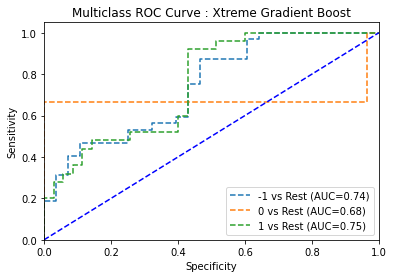

In [ ]:
from sklearn.preprocessing import label_binarize

Y_test_binarized = label_binarize(Y_test, classes = np.unique(Y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : Xtreme Gradient Boost')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc= 'lower right')
plt.show()

**Stacking Random Forest**

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
randomf = RandomForestClassifier(n_jobs=-1)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
from sklearn.model_selection import GridSearchCV
estimators = [('rf', randomf),('neural', nnc),
        ('knn',knn)
        ]
from sklearn.ensemble import StackingClassifier
final_estimator = {'final_estimator':[randomf,knn,nnc,None]}
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
newgsearchrandom =  StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=randomf)
newgsearchrandom.fit(X_train, Y_train)
from sklearn.metrics import accuracy_score
newgsearchrandom_pred = newgsearchrandom.predict(X_test)
newgsearchrandom_acc=accuracy_score(Y_test, newgsearchrandom_pred)
print(newgsearchrandom_acc)

0.6333333333333333


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, newgsearchrandom_pred))

              precision    recall  f1-score   support

          -1       0.61      0.88      0.72        32
           0       1.00      0.67      0.80         3
           1       0.67      0.32      0.43        25

    accuracy                           0.63        60
   macro avg       0.76      0.62      0.65        60
weighted avg       0.65      0.63      0.60        60



Text(0.5, 145.31999999999996, 'Predicted')

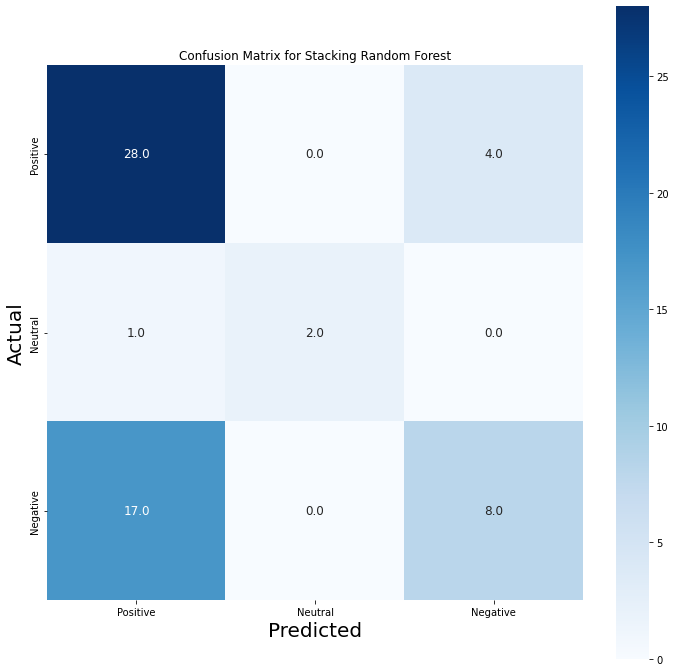

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = newgsearchrandom_pred
label=['Positive', 'Neutral','Negative']
Ytrue = Y_test 
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Stacking Random Forest")
ax = sns.heatmap(cm, cmap="Blues", fmt=".01f",annot_kws={'size':12}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_SRF = confusion_matrix(Y_test, newgsearchrandom_pred, labels=[1,0, -1])
cmt_SRF = confusion_matrix(Y_test, newgsearchrandom_pred)

In [ ]:
print(cmt_SRF)

[[28  0  4]
 [ 1  2  0]
 [17  0  8]]


In [ ]:
fp = cmt_SRF.sum(axis=0) - np.diag(cm)  
fn = cmt_SRF.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_SRF)
tn = cmt_SRF.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[18  0  4] [ 4  1 17] [28  2  8] [10 57 31]


In [ ]:
idx = 0
print( "TP rate for Class Positive:",tp[idx])
print( "TN rate for Class Positive:",tn[idx])
print( "FP rate for Class Positive:",fp[idx])
print( "FN rate for Class Positive:",fn[idx])

TP rate for Class Positive: 28
TN rate for Class Positive: 10
FP rate for Class Positive: 18
FN rate for Class Positive: 4


In [ ]:
idx = 1
print( "TP rate for Class Neutral:",tp[idx])
print( "TN rate for Class Neutral:",tn[idx])
print( "FP rate for Class Neutral:",fp[idx])
print( "FN rate for Class Neutral:",fn[idx])

TP rate for Class Neutral: 2
TN rate for Class Neutral: 57
FP rate for Class Neutral: 0
FN rate for Class Neutral: 1


In [ ]:
idx = 2
print( "TP rate for Class Negative:",tp[idx])
print( "TN rate for Class Negative:",tn[idx])
print( "FP rate for Class Negative:",fp[idx])
print( "FN rate for Class Negative:",fn[idx])

TP rate for Class Negative: 8
TN rate for Class Negative: 31
FP rate for Class Negative: 4
FN rate for Class Negative: 17


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.6333333333333333


In [ ]:
Stacking_RF = OneVsRestClassifier(StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=randomf))
Stacking_RF.fit(X_train, Y_train)
y_pred = Stacking_RF.predict(X_test)
pred_prob = Stacking_RF.predict_proba(X_test)

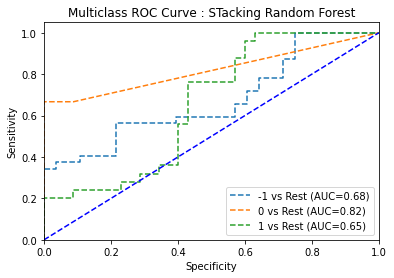

In [ ]:
from sklearn.preprocessing import label_binarize

Y_test_binarized = label_binarize(Y_test, classes = np.unique(Y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : STacking Random Forest')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc= 'lower right')
plt.show()

**Stacking Neural Network**

In [ ]:
newgsearchnnc =  StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=nnc)
newgsearchnnc.fit(X_train, Y_train)
newgsearchnnc_pred = newgsearchnnc.predict(X_test)
newgsearchnnc_acc=accuracy_score(Y_test, newgsearchnnc_pred)
print(newgsearchnnc_acc)

0.6


In [ ]:
print(classification_report(Y_test, newgsearchnnc_pred))

              precision    recall  f1-score   support

          -1       0.58      0.88      0.70        32
           0       1.00      0.67      0.80         3
           1       0.60      0.24      0.34        25

    accuracy                           0.60        60
   macro avg       0.73      0.59      0.61        60
weighted avg       0.61      0.60      0.56        60



Text(0.5, 145.31999999999996, 'Predicted')

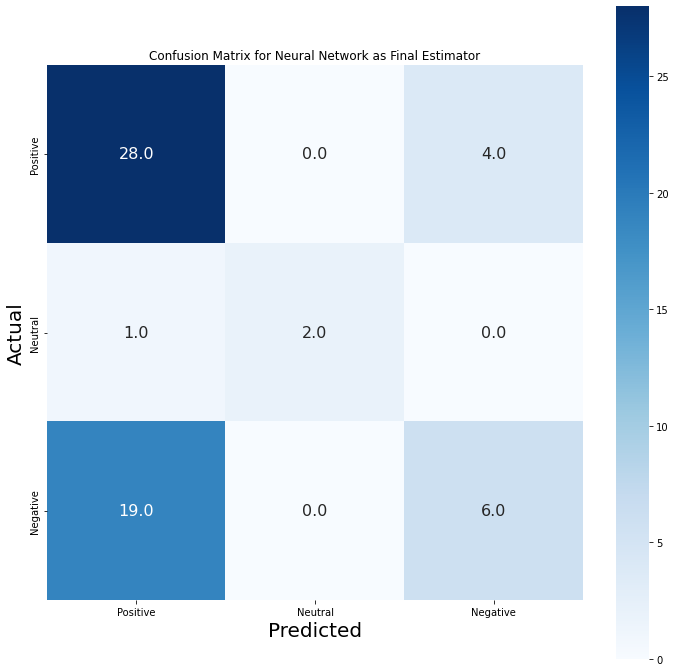

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = newgsearchnnc_pred
label=['Positive', 'Neutral','Negative']
Ytrue = Y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Neural Network as Final Estimator")
ax = sns.heatmap(cm, cmap="Blues", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_SANN = confusion_matrix(Y_test, newgsearchnnc_pred, labels=[1,0,-1])
cmt_SANN = confusion_matrix(Y_test, newgsearchnnc_pred)

In [ ]:
print(cmt_SANN)

[[28  0  4]
 [ 1  2  0]
 [19  0  6]]


In [ ]:
fp = cmt_SANN.sum(axis=0) - np.diag(cm)  
fn = cmt_SANN.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_SANN)
tn = cmt_SANN.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[20  0  4] [ 4  1 19] [28  2  6] [ 8 57 31]


In [ ]:
idx = 0
print( "TP rate for Class Positive:",tp[idx])
print( "TN rate for Class Positive:",tn[idx])
print( "FP rate for Class Positive:",fp[idx])
print( "FN rate for Class Positive:",fn[idx])

TP rate for Class Positive: 28
TN rate for Class Positive: 8
FP rate for Class Positive: 20
FN rate for Class Positive: 4


In [ ]:
idx = 1
print( "TP rate for Class Neutral:",tp[idx])
print( "TN rate for Class Neutral:",tn[idx])
print( "FP rate for Class Neutral:",fp[idx])
print( "FN rate for Class Neutral:",fn[idx])

TP rate for Class Neutral: 2
TN rate for Class Neutral: 57
FP rate for Class Neutral: 0
FN rate for Class Neutral: 1


In [ ]:
idx = 2
print( "TP rate for Class Negative:",tp[idx])
print( "TN rate for Class Negative:",tn[idx])
print( "FP rate for Class Negative:",fp[idx])
print( "FN rate for Class Negative:",fn[idx])

TP rate for Class Negative: 6
TN rate for Class Negative: 31
FP rate for Class Negative: 4
FN rate for Class Negative: 19


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.6


In [ ]:
Stacking_ANN =   OneVsRestClassifier(StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=nnc))
Stacking_ANN.fit(X_train, Y_train)
y_pred = Stacking_ANN.predict(X_test)
pred_prob = Stacking_ANN.predict_proba(X_test)

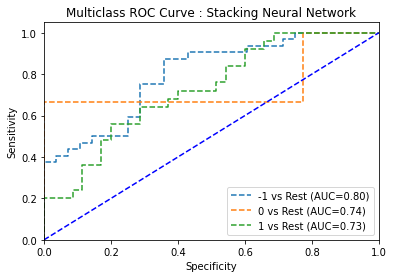

In [ ]:
from sklearn.preprocessing import label_binarize

Y_test_binarized = label_binarize(Y_test, classes = np.unique(Y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : Stacking Neural Network')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc= 'lower right')
plt.show()

**SVM**

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=10, class_weight='balanced')
svc.fit(X_train, Y_train)

LinearSVC(C=10, class_weight='balanced')

In [ ]:
SVM_pred = svc.predict(X_test)
print(Y_test)

208    1
188   -1
12     1
221   -1
239    1
136    1
230   -1
206   -1
52     1
108    1
290    1
15     1
184    1
248    1
22     1
74     0
270    1
90    -1
229   -1
164    1
190   -1
103   -1
124   -1
129   -1
222   -1
116    1
194   -1
286   -1
234    1
295    0
92     1
66    -1
8      1
122   -1
219   -1
150    1
176   -1
182   -1
299   -1
5      1
223   -1
89     1
81    -1
34     1
55    -1
139   -1
236   -1
64    -1
7     -1
45    -1
73    -1
213   -1
173    1
106   -1
59    -1
253    1
168    1
26     1
284    0
153   -1
Name: vader_sentiment_label, dtype: int64


In [ ]:
SVM_acc = accuracy_score(Y_test, SVM_pred)
print(SVM_acc)

0.65


In [ ]:
print(classification_report(Y_test, SVM_pred))

              precision    recall  f1-score   support

          -1       0.61      0.97      0.75        32
           0       1.00      0.67      0.80         3
           1       0.86      0.24      0.38        25

    accuracy                           0.65        60
   macro avg       0.82      0.63      0.64        60
weighted avg       0.73      0.65      0.59        60



In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_new = SVC(kernel ='rbf', class_weight='balanced')
svc_new.fit(X_train, Y_train)

SVC(class_weight='balanced')

In [ ]:
SVM_newpred = svc_new.predict(X_test)

In [ ]:
SVMnew_acc = accuracy_score(Y_test, SVM_newpred)
print(SVMnew_acc)

0.65


In [ ]:
print(classification_report(Y_test, SVM_newpred))

              precision    recall  f1-score   support

          -1       0.60      1.00      0.75        32
           0       1.00      0.67      0.80         3
           1       1.00      0.20      0.33        25

    accuracy                           0.65        60
   macro avg       0.87      0.62      0.63        60
weighted avg       0.79      0.65      0.58        60



Text(0.5, 145.31999999999996, 'Predicted')

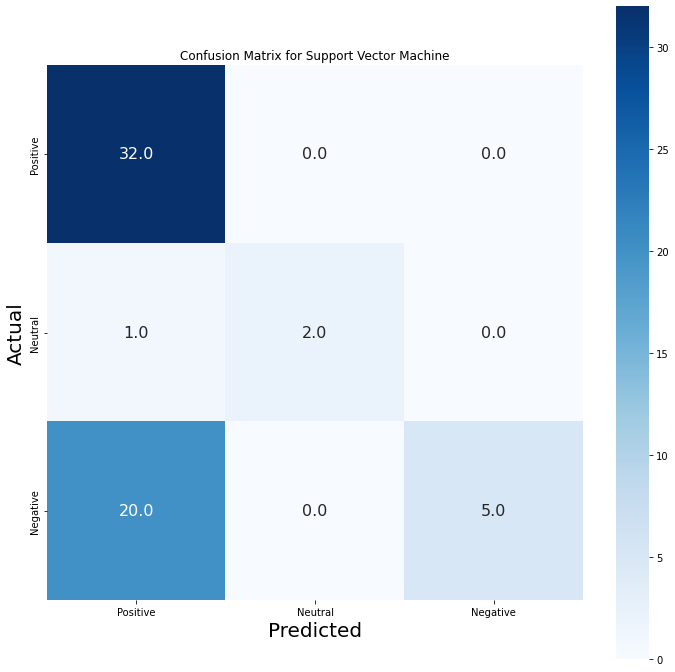

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = SVM_newpred
label=['Positive', 'Neutral','Negative']
Ytrue = Y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Support Vector Machine")
ax = sns.heatmap(cm, cmap="Blues", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_SVM = confusion_matrix(Y_test, SVM_newpred, labels=[1,0,-1])
cmt_SVM = confusion_matrix(Y_test, SVM_newpred)

In [ ]:
print(cmt_SVM)

[[32  0  0]
 [ 1  2  0]
 [20  0  5]]


In [ ]:
fp = cmt_SVM.sum(axis=0) - np.diag(cm)  
fn = cmt_SVM.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_SVM)
tn = cmt_SVM.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[21  0  0] [ 0  1 20] [32  2  5] [ 7 57 35]


In [ ]:
idx = 0
print( "TP rate for Class Positive:",tp[idx])
print( "TN rate for Class Positive:",tn[idx])
print( "FP rate for Class Positive:",fp[idx])
print( "FN rate for Class Positive:",fn[idx])

TP rate for Class Positive: 32
TN rate for Class Positive: 7
FP rate for Class Positive: 21
FN rate for Class Positive: 0


In [ ]:
idx = 1
print( "TP rate for Class Neutral:",tp[idx])
print( "TN rate for Class Neutral:",tn[idx])
print( "FP rate for Class Neutral:",fp[idx])
print( "FN rate for Class Neutral:",fn[idx])

TP rate for Class Neutral: 2
TN rate for Class Neutral: 57
FP rate for Class Neutral: 0
FN rate for Class Neutral: 1


In [ ]:
idx = 2
print( "TP rate for Class Negative:",tp[idx])
print( "TN rate for Class Negative:",tn[idx])
print( "FP rate for Class Negative:",fp[idx])
print( "FN rate for Class Negative:",fn[idx])

TP rate for Class Negative: 5
TN rate for Class Negative: 35
FP rate for Class Negative: 0
FN rate for Class Negative: 20


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.65


In [ ]:
SVM_new =   OneVsRestClassifier(SVC(kernel ='rbf',probability=True, class_weight='balanced'))
SVM_new.fit(X_train, Y_train)
y_pred = SVM_new.predict(X_test)
pred_prob = SVM_new.predict_proba(X_test)

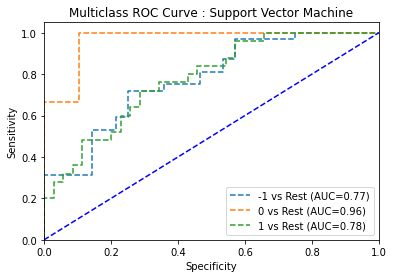

In [ ]:
from sklearn.preprocessing import label_binarize

Y_test_binarized = label_binarize(Y_test, classes = np.unique(Y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : Support Vector Machine')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc= 'lower right')
plt.show()

**Bagging - SVC**

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [ ]:
bagging = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0).fit(X_train, Y_train)

In [ ]:
bagging_pred = bagging.predict(X_test)

In [ ]:
bagging_acc = accuracy_score(Y_test, bagging_pred)
print(bagging_acc)

0.6166666666666667


In [ ]:
print(classification_report(Y_test, bagging_pred))

              precision    recall  f1-score   support

          -1       0.58      1.00      0.74        32
           0       1.00      0.33      0.50         3
           1       1.00      0.16      0.28        25

    accuracy                           0.62        60
   macro avg       0.86      0.50      0.50        60
weighted avg       0.78      0.62      0.53        60



Text(0.5, 145.31999999999996, 'Predicted')

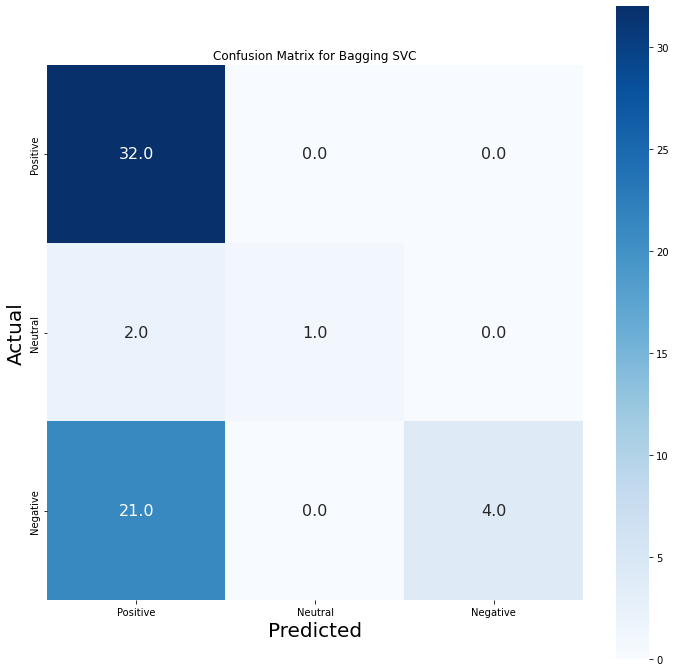

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = bagging_pred
label=['Positive', 'Neutral','Negative']
Ytrue = Y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Bagging SVC")
ax = sns.heatmap(cm, cmap="Blues", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_baggingSVC = confusion_matrix(Y_test, bagging_pred, labels=[1,0,-1])
cmt_baggingSVC = confusion_matrix(Y_test, bagging_pred)

In [ ]:
print(cmt_baggingSVC)

[[32  0  0]
 [ 2  1  0]
 [21  0  4]]


In [ ]:
fp = cmt_SVM.sum(axis=0) - np.diag(cm)  
fn = cmt_SVM.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_SVM)
tn = cmt_SVM.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[21  1  1] [ 0  2 21] [32  2  5] [ 7 55 33]


In [ ]:
idx = 0
print( "TP rate for Class Positive:",tp[idx])
print( "TN rate for Class Positive:",tn[idx])
print( "FP rate for Class Positive:",fp[idx])
print( "FN rate for Class Positive:",fn[idx])

TP rate for Class Positive: 32
TN rate for Class Positive: 7
FP rate for Class Positive: 21
FN rate for Class Positive: 0


In [ ]:
idx = 1
print( "TP rate for Class Neutral:",tp[idx])
print( "TN rate for Class Neutral:",tn[idx])
print( "FP rate for Class Neutral:",fp[idx])
print( "FN rate for Class Neutral:",fn[idx])

TP rate for Class Neutral: 2
TN rate for Class Neutral: 55
FP rate for Class Neutral: 1
FN rate for Class Neutral: 2


In [ ]:
idx = 2
print( "TP rate for Class Negative:",tp[idx])
print( "TN rate for Class Negative:",tn[idx])
print( "FP rate for Class Negative:",fp[idx])
print( "FN rate for Class Negative:",fn[idx])

TP rate for Class Negative: 5
TN rate for Class Negative: 33
FP rate for Class Negative: 1
FN rate for Class Negative: 21


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.6166666666666667


In [ ]:
bagging_svc =   OneVsRestClassifier(BaggingClassifier(base_estimator=SVC(), n_estimators=10))
bagging_svc.fit(X_train, Y_train)
y_pred = bagging_svc.predict(X_test)
pred_prob = bagging_svc.predict_proba(X_test)

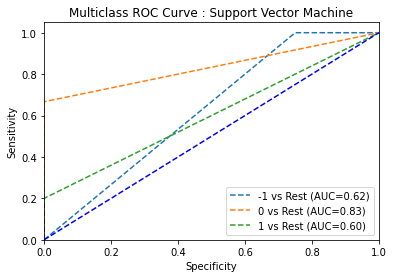

In [ ]:
from sklearn.preprocessing import label_binarize

Y_test_binarized = label_binarize(Y_test, classes = np.unique(Y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : Support Vector Machine')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc= 'lower right')
plt.show()

**Bagging - RF**

In [ ]:
bagging_RF = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100)).fit(X_train, Y_train)

In [ ]:
baggingRF_pred = bagging_RF.predict(X_test)

In [ ]:
baggingRF_acc = accuracy_score(Y_test, baggingRF_pred)
print(baggingRF_acc)

0.65


In [ ]:
print(classification_report(Y_test, baggingRF_pred))

              precision    recall  f1-score   support

          -1       0.63      0.84      0.72        32
           0       1.00      0.67      0.80         3
           1       0.67      0.40      0.50        25

    accuracy                           0.65        60
   macro avg       0.76      0.64      0.67        60
weighted avg       0.66      0.65      0.63        60



Text(0.5, 145.31999999999996, 'Predicted')

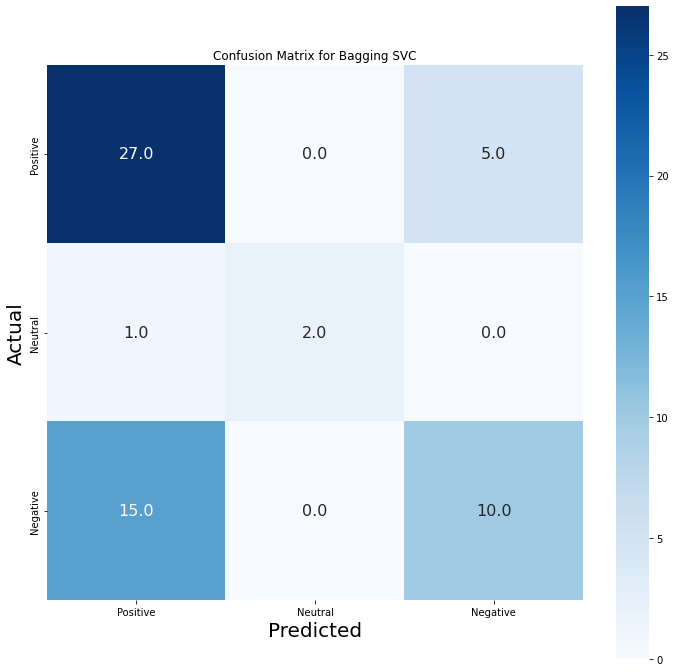

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = baggingRF_pred
label=['Positive', 'Neutral','Negative']
Ytrue = Y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Bagging SVC")
ax = sns.heatmap(cm, cmap="Blues", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
cmt_baggingRF = confusion_matrix(Y_test, baggingRF_pred, labels=[1,0,-1])
cmt_baggingRF = confusion_matrix(Y_test, baggingRF_pred)

In [ ]:
print(cmt_baggingRF)

[[27  0  5]
 [ 1  2  0]
 [15  0 10]]


In [ ]:
fp = cmt_SVM.sum(axis=0) - np.diag(cm)  
fn = cmt_SVM.sum(axis=1) - np.diag(cm)
tp = np.diag(cmt_SVM)
tn = cmt_SVM.sum() - (fp + fn + tp)

print(fp,fn,tp,tn)

[26  0 -5] [ 5  1 15] [32  2  5] [-3 57 45]


In [ ]:
idx = 0
print( "TP rate for Class Positive:",tp[idx])
print( "TN rate for Class Positive:",tn[idx])
print( "FP rate for Class Positive:",fp[idx])
print( "FN rate for Class Positive:",fn[idx])

TP rate for Class Positive: 32
TN rate for Class Positive: -3
FP rate for Class Positive: 26
FN rate for Class Positive: 5


In [ ]:
idx = 1
print( "TP rate for Class Neutral:",tp[idx])
print( "TN rate for Class Neutral:",tn[idx])
print( "FP rate for Class Neutral:",fp[idx])
print( "FN rate for Class Neutral:",fn[idx])

TP rate for Class Neutral: 2
TN rate for Class Neutral: 57
FP rate for Class Neutral: 0
FN rate for Class Neutral: 1


In [ ]:
idx = 2
print( "TP rate for Class Negative:",tp[idx])
print( "TN rate for Class Negative:",tn[idx])
print( "FP rate for Class Negative:",fp[idx])
print( "FN rate for Class Negative:",fn[idx])

TP rate for Class Negative: 5
TN rate for Class Negative: 45
FP rate for Class Negative: -5
FN rate for Class Negative: 15


In [ ]:
acc = np.diag(cm).sum() / cm.sum()
print(acc)

0.65


In [ ]:
bagging_RF = OneVsRestClassifier(BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=100))
bagging_RF.fit(X_train, Y_train)
y_pred = bagging_RF.predict(X_test)
pred_prob = bagging_RF.predict_proba(X_test)

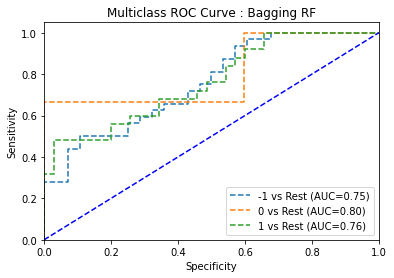

In [ ]:
from sklearn.preprocessing import label_binarize

Y_test_binarized = label_binarize(Y_test, classes = np.unique(Y_test))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : Bagging RF')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc= 'lower right')
plt.show()